In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import os

In [2]:
curr_path ="Documents\Python Scripts\Python_Project\Traffic"

In [3]:
data=[]
labels=[]
category=43

In [4]:
for i in range(category):
    path=os.path.join(curr_path,"Train",str(i))

    for img in os.listdir(path):
        img_path=os.path.join(path, img)

        image=load_img(img_path,target_size=(30,30))
        image =img_to_array(image)
        
        data.append(image)
        labels.append(i)

In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [9]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
epochs = 15
result= model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 107s 84ms/step - loss: 3.5822 - accuracy: 0.2383 - val_loss: 0.8502 - val_accuracy: 0.7803
Epoch 2/15
981/981 [==============================] - 81s 83ms/step - loss: 1.1653 - accuracy: 0.6544 - val_loss: 0.4221 - val_accuracy: 0.8753
Epoch 3/15
981/981 [==============================] - 81s 83ms/step - loss: 0.7626 - accuracy: 0.7646 - val_loss: 0.3169 - val_accuracy: 0.8988
Epoch 4/15
981/981 [==============================] - 81s 83ms/step - loss: 0.5588 - accuracy: 0.8280 - val_loss: 0.2180 - val_accuracy: 0.9364
Epoch 5/15
981/981 [==============================] - 81s 83ms/step - loss: 0.4735 - accuracy: 0.8560 - val_loss: 0.1878 - val_accuracy: 0.9441
Epoch 6/15
981/981 [==============================] - 81s 83ms/step - loss: 0.4365 - accuracy: 0.8654 - val_loss: 0.2211 - val_accuracy: 0.9370
Epoch 7/15
981/981 [==============================] - 81s 83ms/step - loss: 0.4013 - accuracy: 0.8784 - val_loss: 0.1619 - val_accuracy

In [18]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

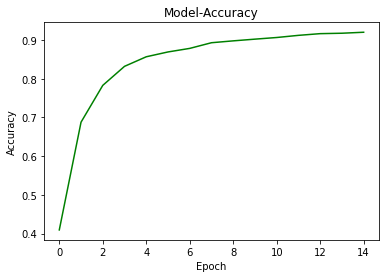

In [34]:
plt.plot(result.history['accuracy'],color="green")
plt.title("Model-Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

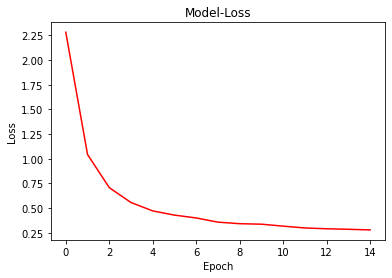

In [35]:
plt.plot(result.history['loss'],color="Red")
plt.title("Model-Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()